In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
# to save and write as pngs
from imageio import imwrite, imread
import math
from scipy import ndimage as ndi

In [2]:
def plt_fig_hist(image):
    plt.figure(figsize=(12,12));
    plt.subplot(1, 2, 1);
    plt.imshow(image, cmap='gray');
    plt.xlabel('x');
    plt.ylabel('y');
    plt.subplot(1, 2, 2);
    uniqe = np.unique(image, return_counts=True);
    plt.plot(uniqe[0],uniqe[1]);
    plt.xlabel('values');
    plt.ylabel('counts');
    plt.show();
    
def print_info(image):
    unique = np.unique(image);
    print('The first 5 values in the image: \n', unique[0:5]);
    print('The maximum value is: {}, and minimum is: {}'.format(np.max(image), np.min(image)));
    print('The mean value is: {}, and the median is: {}'.format(np.mean(image), np.median(image)));
    print('Total Number of values in the image: ',len(unique));
    print('The image size: {}, dimensions: {} and the shape: {}'.format(image.size, image.ndim, image.shape));    
    
def give_transferMatrix(scaling):
    sx=scaling[0]
    sy=scaling[1]
    scale_matrix = [[sx, 0],
                [0, sy]]
    return scale_matrix

def build_weighMatrix(image, radius=None):
    if radius == None:
        radius = image.shape[0]/5;
    else:
        radius = radius;
        
    G = np.zeros((image.shape[0]**2,image.shape[1]**2));
    fltn_img = image.flatten();
    std_img = np.std(image);
    indices_dict = build_indices_dict(image);
    
    for i in range(G.shape[0]):
        # compute the distance weighting for the node to any node in the image, image.shape[0]^2 array long
#         node_distance = calc_node_distances(image, indices_dict[i], radius); 
        for j in range(G.shape[1]):
            
            distance_diff = calc_node_distance(indices_dict[i], indices_dict[j]);
            if int(np.round(distance_diff)) < radius:
                distance_diff = np.exp(-distance_diff/len(image));  
            else:
                distance_diff = 0;
            intens_diff = np.exp(-calc_nodes_intens_diff(image[indices_dict[i]], image[indices_dict[j]])/std_img)
            G[i,j] = intens_diff * distance_diff;
            
            #             intens = np.exp(-(np.sqrt(np.pow(image[indices_dict[i]] - image[indices_dict[j]], 2)))/std_img);
            #             G[i,j] = intens*node_distance[j];# multply by the spatial weighting for a specific node j 
    
    return G;

def calc_node_distance(nodeA, nodeB):    
    dis_deff = np.sqrt(np.power(nodeA[0]-nodeB[0], 2) + np.power(nodeA[1]-nodeB[1], 2));
    return dis_deff;

def calc_nodes_intens_diff(intensityA, intensityB):
    intens_diff = np.sqrt(np.power(intensityA - intensityB, 2));
    return intens_diff;

def build_indices_dict(image):
    indices = dict()
    s = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            indices[s] = (i, j)
            s += 1
    return indices

# def calc_node_distances(image, currecnt_pos=None, radius=None):
        
#     if currecnt_pos[0] ==None or currecnt_pos[1]== None or radius==None:
#         currentX = 0;
#         currentY = 0;
#         radius = image.shape[0]/16;
#     else:
#         currentX = currecnt_pos[0]; currentY=currecnt_pos[1]; radius=radius;
            
#     distance = np.zeros((image.shape[0], image.shape[1]));
#     for i in range(image.shape[0]):
#         dist_x = math.pow(currentX-i, 2);
#         for j in range(image.shape[1]):
#             d = np.sqrt(dist_x + math.pow(currentY-j, 2));
#             if int(np.round(d)) < radius:
#                 distance[i,j] = np.exp(-d/len(image)); 
#     return distance.flatten();



In [3]:
# image = imread("testImagio_dicom.png");
im_obj = sitk.ReadImage('data/IMG-0002-00074.dcm');
im_array = sitk.GetArrayViewFromImage(im_obj)
im_array_squeezed = im_array.squeeze()
image = im_array_squeezed;

In [149]:
gdf = geopandas.GeoDataFrame(image);
gdf

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-997,-998,-1005,-1003,-1003,-1003,-1003,-1000,-996,-1006
1,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-998,-1009,-1007,-998,-1000,-1004,-1003,-1002,-1001,-1009
2,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-1006,-1004,-1000,-998,-999,-1006,-1003,-1002,-1005,-1000
3,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-1001,-994,-1007,-1007,-997,-1001,-999,-1003,-1006,-1002
4,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-994,-1009,-1015,-996,-991,-1000,-1006,-1009,-1003,-998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-981,-957,-884,-774,-585,-311,-86,-71,-306,-619
508,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-943,-874,-736,-556,-303,-83,-106,-350,-615,-801
509,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-831,-699,-480,-233,-61,-109,-385,-672,-846,-940
510,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-659,-445,-192,-34,-113,-379,-674,-869,-966,-1010


In [52]:
print_info(image);

The first 5 values in the image: 
 [-1024 -1023 -1022 -1021 -1020]
The maximum value is: 1118, and minimum is: -1024
Total Number of values in the image:  1848
The image size: 262144, dimensions: 2 and the shape: (512, 512)


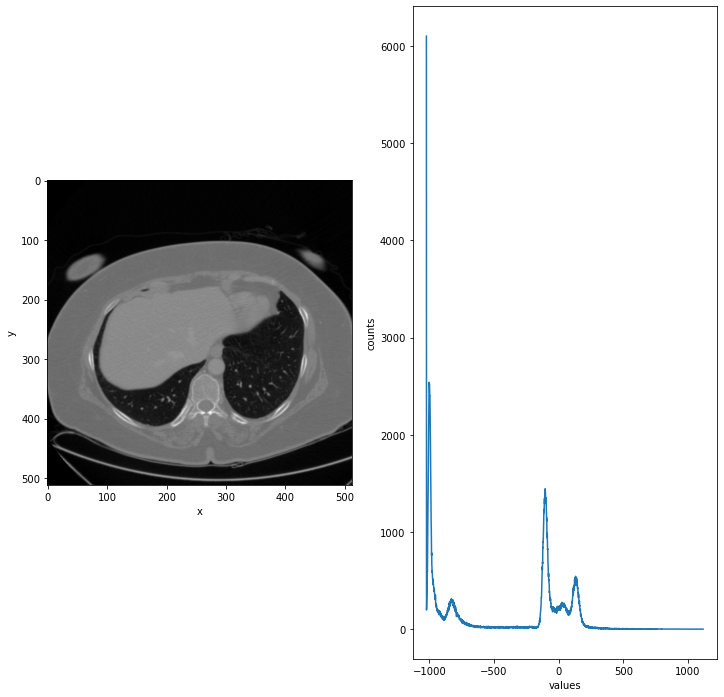

In [32]:
plt_fig_hist(image);

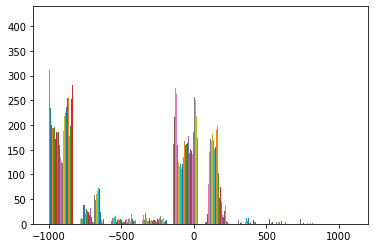

In [33]:
plt.hist(image)
plt.show()

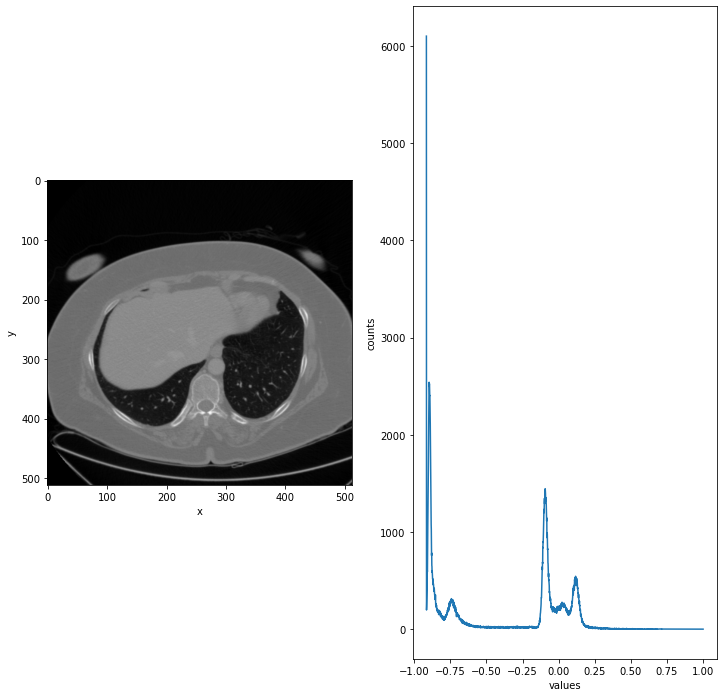

In [6]:
norm_img = image/np.max(image);
plt_fig_hist(norm_img);

In [58]:
print_info(norm_img)

The first 5 values in the image: 
 [-0.91592129 -0.91502683 -0.91413238 -0.91323792 -0.91234347]
The maximum value is: 1.0, and minimum is: -0.9159212880143113
Total Number of values in the image:  1848
The image size: 262144, dimensions: 2 and the shape: (512, 512)


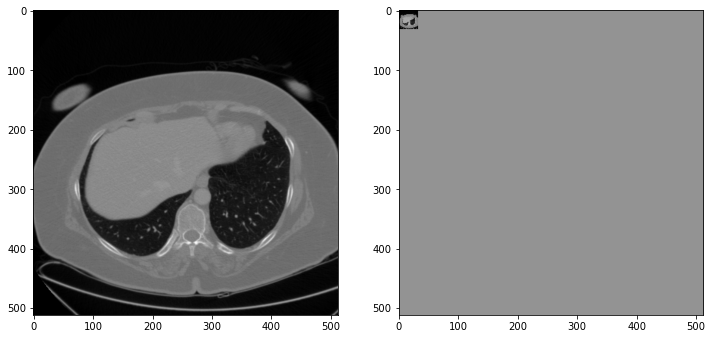

In [11]:
scaling_factor = 5;
transf_matrix = give_transferMatrix([scaling_factor, scaling_factor]);

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.interpolation.affine_transform.html
ssd_reg_img = ndi.interpolation.affine_transform(norm_img, transf_matrix, offset=(0, 0))

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(norm_img, cmap='gray')
plt.subplot(122)
plt.imshow(ssd_reg_img, cmap='gray')
plt.show()

In [12]:
scaled_image = ssd_reg_img[0:int(round(image.shape[0]/scaling_factor)), 0:int(round(image.shape[1]/scaling_factor))];

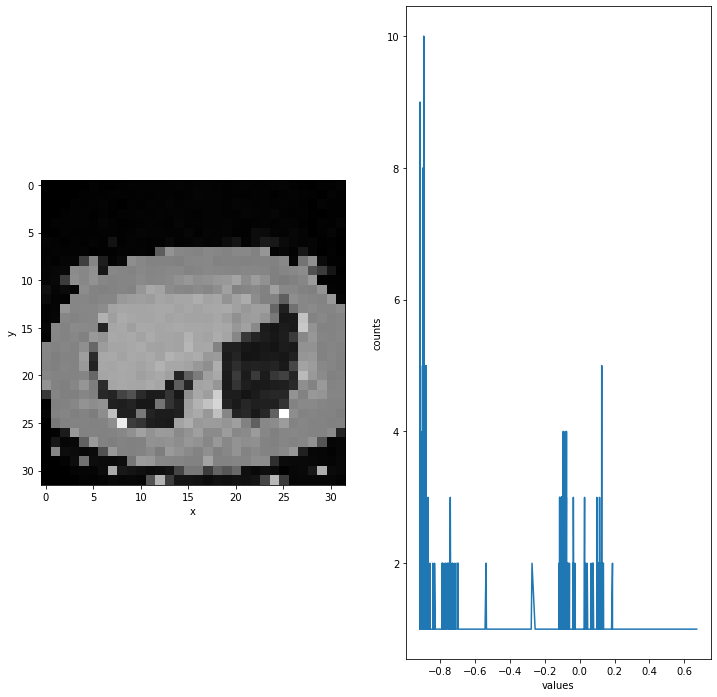

In [13]:
plt_fig_hist(scaled_image)

In [14]:
print_info(scaled_image)

The first 5 values in the image: 
 [-0.91592129 -0.91592129 -0.91592129 -0.91592129 -0.91592129]
The maximum value is: 0.670840787119857, and minimum is: -0.9159212880143124
The mean value is: -0.40388284045169953, and the median is: -0.1422182468694097
Total Number of values in the image:  723
The image size: 1024, dimensions: 2 and the shape: (32, 32)


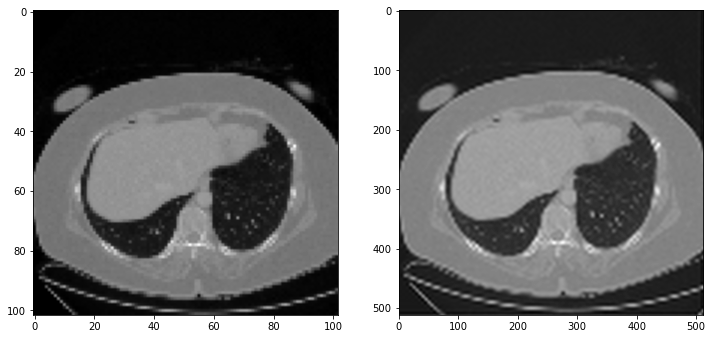

In [39]:
# test to go back to original size, loose resolution! maybe it's okey, we only need to obtain a segmentation mask to
# put on/merge with the original image!
invers_scaling_factor = 1/scaling_factor;
transf_matrix = give_transferMatrix([invers_scaling_factor , invers_scaling_factor]);

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.interpolation.affine_transform.html
ssd_reg_img_test = ndi.interpolation.affine_transform(ssd_reg_img, transf_matrix, offset=(0, 0))

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(scaled_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(ssd_reg_img_test, cmap='gray')
plt.show()

In [15]:
non_neg_scaled_image = np.sqrt((scaled_image+np.abs(np.min(scaled_image)))**2); # add an offset and 'remove' negative values
non_neg_scaled_image = non_neg_scaled_image/np.max(non_neg_scaled_image); # normalize

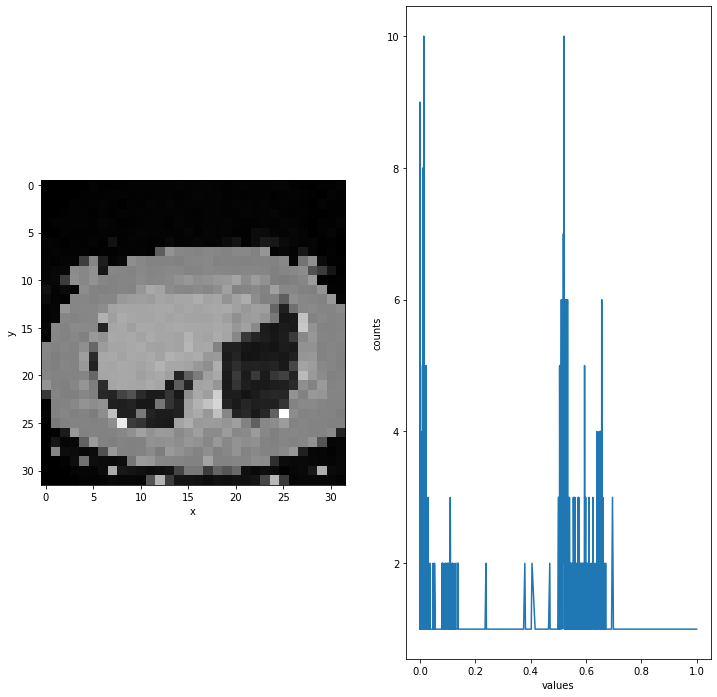

In [16]:
plt_fig_hist(non_neg_scaled_image)

In [17]:
print_info(non_neg_scaled_image)

The first 5 values in the image: 
 [0.00000000e+00 2.79871328e-16 3.49839161e-16 4.19806993e-16
 4.89774825e-16]
The maximum value is: 1.0, and minimum is: 0.0
The mean value is: 0.3226939032553555, and the median is: 0.4875986471251412
Total Number of values in the image:  581
The image size: 1024, dimensions: 2 and the shape: (32, 32)


In [72]:
weight_matrix = build_weighMatrix(non_neg_scaled_image);

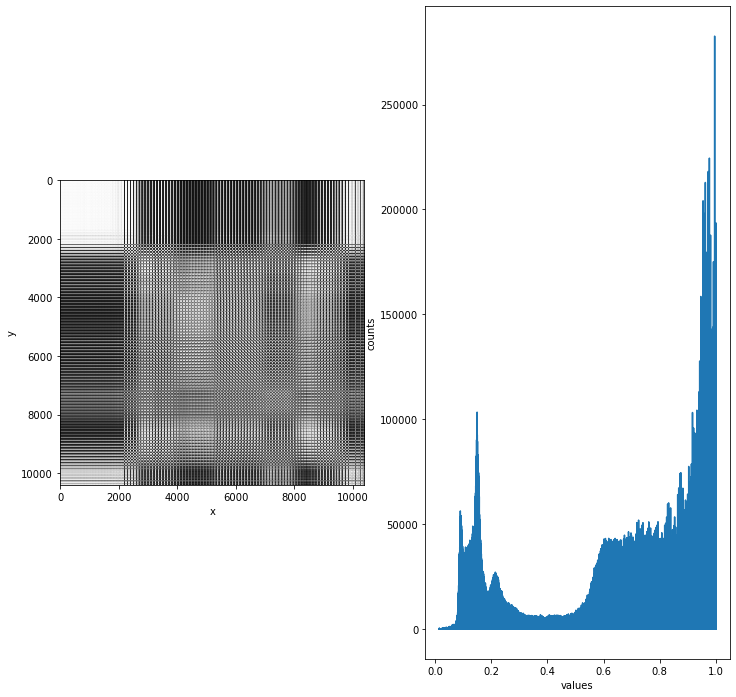

In [98]:
plt_fig_hist(weight_matrix);

In [74]:
print_info(weight_matrix)

The first 5 values in the image: 
 [0.         0.00923724 0.01198228 0.01594265 0.01680844]
The maximum value is: 1.0, and minimum is: 0.0
The mean value is: 0.0028216166987971272, and the median is: 0.0
Total Number of values in the image:  1855
The image size: 1048576, dimensions: 2 and the shape: (1024, 1024)


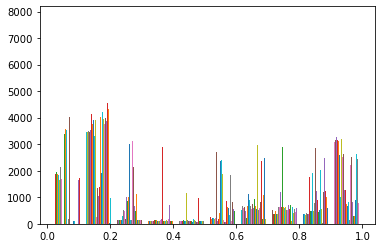

In [110]:
plt.hist(weight_matrix)
plt.show()

In [4]:
# clipp values out of interest from original image 
test_clipping_img = np.array(image);
test_clipping_img.setflags(write=1); # allow clipping values
# test_clipping_img.flags
test_clipping_img[test_clipping_img < -160] = 0; # the region of the liver, clipp the others!
test_clipping_img[test_clipping_img > 240] = 0;

norm_test_clipping_img = np.sqrt((test_clipping_img+np.abs(np.min(test_clipping_img)))**2); # add an offset to 'remove' negative values
norm_test_clipping_img = norm_test_clipping_img/np.max(norm_test_clipping_img); # normalize


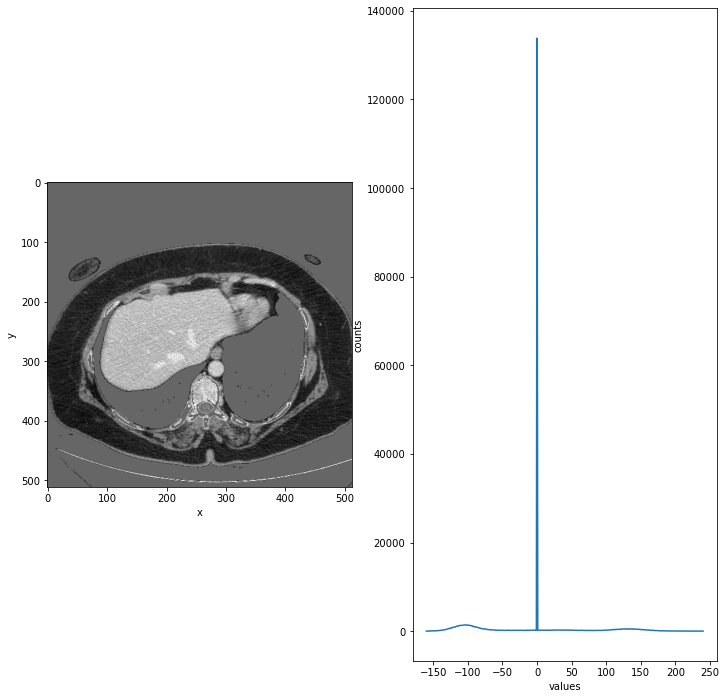

In [5]:
plt_fig_hist(test_clipping_img);

In [6]:
print_info(test_clipping_img)

The first 5 values in the image: 
 [-160 -159 -158 -157 -156]
The maximum value is: 240, and minimum is: -160
The mean value is: -6.6493072509765625, and the median is: 0.0
Total Number of values in the image:  401
The image size: 262144, dimensions: 2 and the shape: (512, 512)


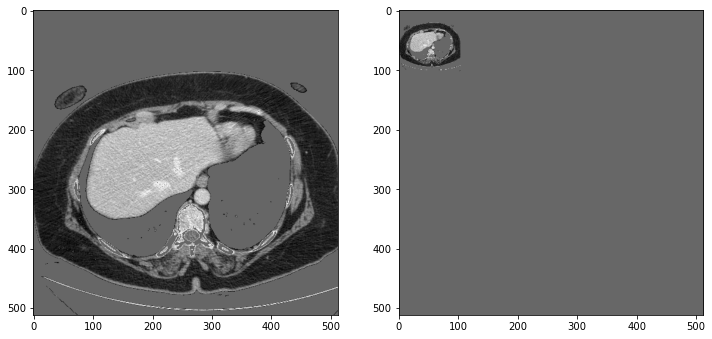

In [21]:
scaling_factor = 5;
transf_matrix = give_transferMatrix([scaling_factor, scaling_factor]);
ssd_regClipped_img = ndi.interpolation.affine_transform(test_clipping_img, transf_matrix, offset=(0, 0))

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(test_clipping_img, cmap='gray')
plt.subplot(122)
plt.imshow(ssd_regClipped_img, cmap='gray')
plt.show()

In [22]:
scaled_clipped_img = ssd_regClipped_img[0:int(round(image.shape[0]/scaling_factor)), 0:int(round(image.shape[1]/scaling_factor))];

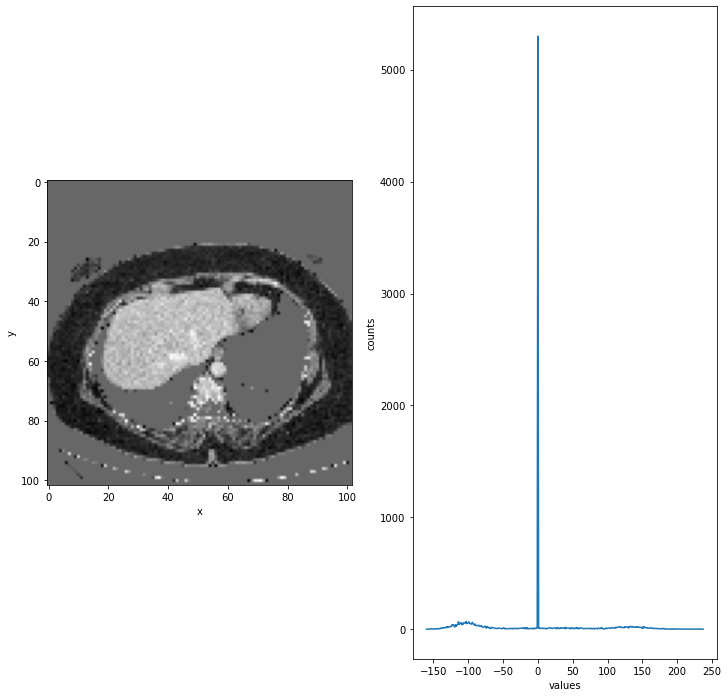

In [23]:
plt_fig_hist(scaled_clipped_img)

In [24]:
print_info(scaled_clipped_img)

The first 5 values in the image: 
 [-160 -159 -158 -157 -156]
The maximum value is: 237, and minimum is: -160
The mean value is: -6.273452518262207, and the median is: 0.0
Total Number of values in the image:  389
The image size: 10404, dimensions: 2 and the shape: (102, 102)


In [ ]:
clipped_img_weight_matrix = build_weighMatrix(scaled_clipped_img, 15);

In [ ]:
plt_fig_hist(clipped_img_weight_matrix);

In [ ]:
print_info(clipped_img_weight_matrix);

In [82]:
# np.savetxt("Ahmad_simi_matrix.csv", g, fmt='%1.4f', delimiter=",")
# imwrite(str("Ahmad_simi_matrix.png"), g)
# i = imread("Ahmad_simi_matrix.png");
# i = i/np.max(i)

In [111]:
clipped_eig = np.linalg.eig(clipped_img_weight_matrix);
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [117]:
print(clipped_eig[1][:])

[[ 1.25839652e-02+0.j  3.27370974e-03+0.j  2.04535636e-03+0.j ...
   9.82556413e-12+0.j -1.15061373e-11+0.j -2.23740175e-11+0.j]
 [ 1.25839652e-02+0.j  3.27370974e-03+0.j  2.04535636e-03+0.j ...
  -9.80096910e-10+0.j -7.86916726e-10+0.j -6.80544053e-10+0.j]
 [ 1.25839652e-02+0.j  3.27370974e-03+0.j  2.04535636e-03+0.j ...
   9.69793091e-09+0.j  7.87233299e-09+0.j  6.62933121e-09+0.j]
 ...
 [ 1.25839652e-02+0.j  3.27370974e-03+0.j  2.04535636e-03+0.j ...
   6.29647021e-08+0.j  5.05301482e-08+0.j  1.09782572e-08+0.j]
 [ 1.25839652e-02+0.j  3.27370974e-03+0.j  2.04535636e-03+0.j ...
  -2.91906713e-07+0.j -6.31119030e-07+0.j -7.57752422e-07+0.j]
 [ 1.25839652e-02+0.j  3.27370974e-03+0.j  2.04535636e-03+0.j ...
  -8.88814751e-07+0.j -9.63833596e-07+0.j -9.69856507e-07+0.j]]


(6156.187812277582+0j)


C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


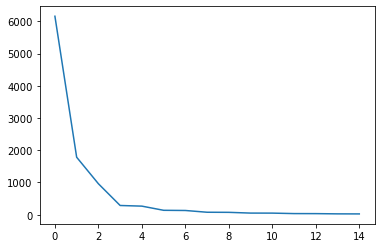

In [112]:
print(np.max(clipped_eig[0]))
plt.plot(clipped_eig[0][0:15]) # first 15 eigen values


C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


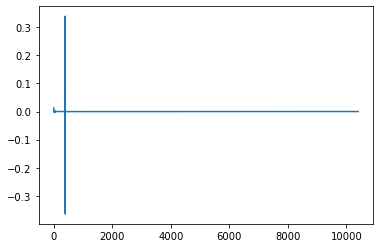

In [114]:
plt.plot(clipped_eig[1][0]); # plot first eigenVector

C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


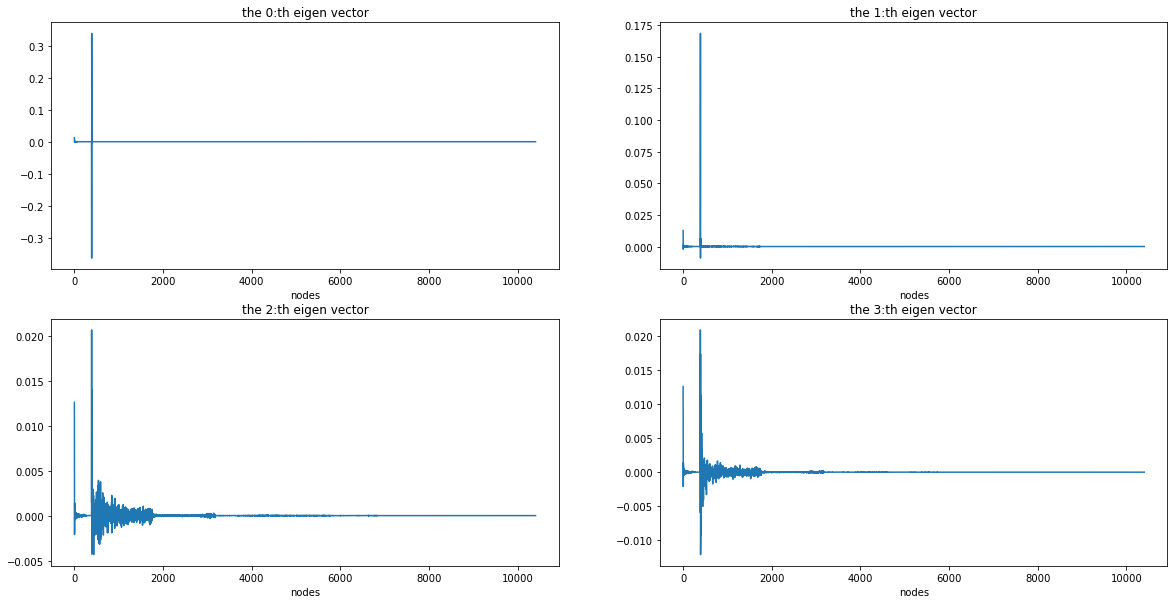

In [115]:
plt.figure(figsize=(20,10));
plt.subplot(2, 2, 1);
plt.plot(clipped_eig[1][0]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(0));
plt.subplot(2, 2, 2);
plt.plot(clipped_eig[1][1]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(1));
plt.subplot(2, 2, 3);
plt.plot(clipped_eig[1][2]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(2));
plt.subplot(2, 2, 4);
plt.plot(clipped_eig[1][3]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(3));
plt.show();

C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


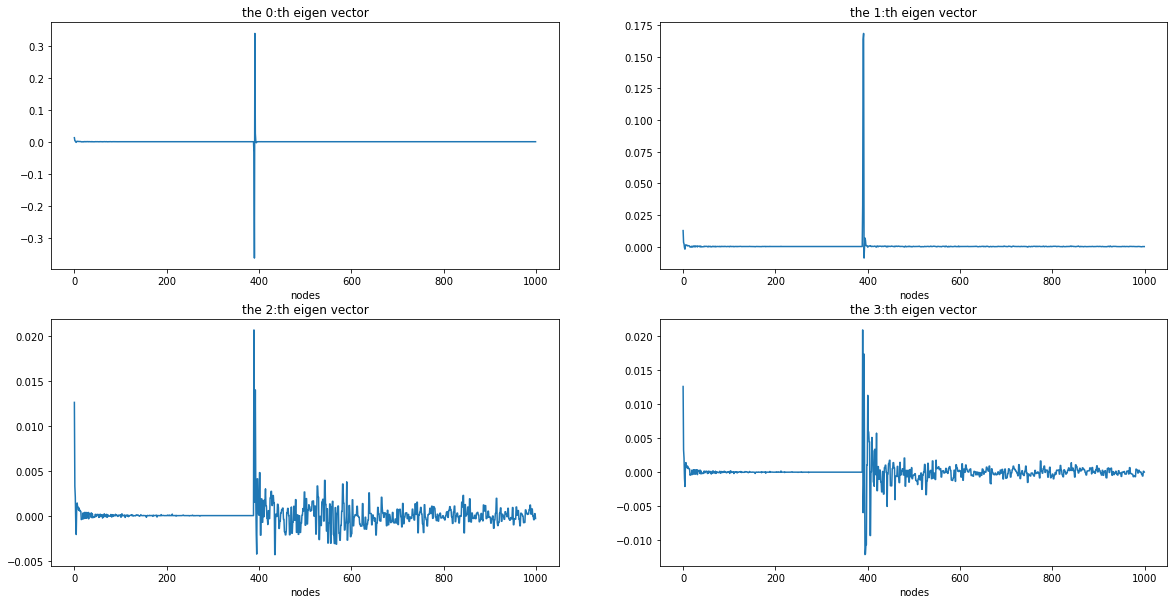

In [116]:
plt.figure(figsize=(20,10));
plt.subplot(2, 2, 1);
plt.plot(clipped_eig[1][0][0:1000]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(0));
plt.subplot(2, 2, 2);
plt.plot(clipped_eig[1][1][0:1000]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(1));
plt.subplot(2, 2, 3);
plt.plot(clipped_eig[1][2][0:1000]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(2));
plt.subplot(2, 2, 4);
plt.plot(clipped_eig[1][3][0:1000]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(3));
plt.show();

In [75]:
# build eigen values/vectors of the none clipped image
eig = np.linalg.eig(weight_matrix);

3.2763236035378607


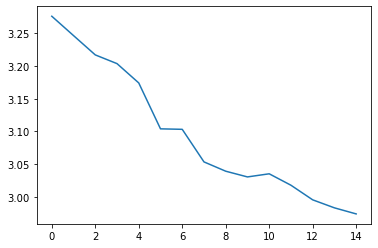

In [76]:
print(np.max(eig[0]))
plt.plot(eig[0][0:15]) # first 15 eigen values

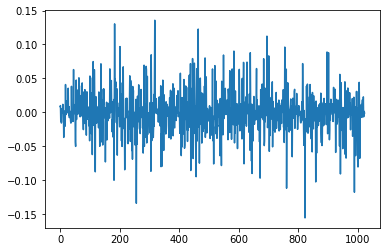

In [77]:
plt.plot(eig[1][0]); # plot first eigenVector

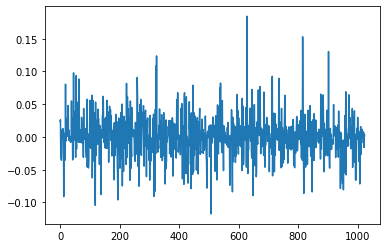

In [78]:
plt.plot(eig[1][2][0:2000]); # plot the third eigenvector


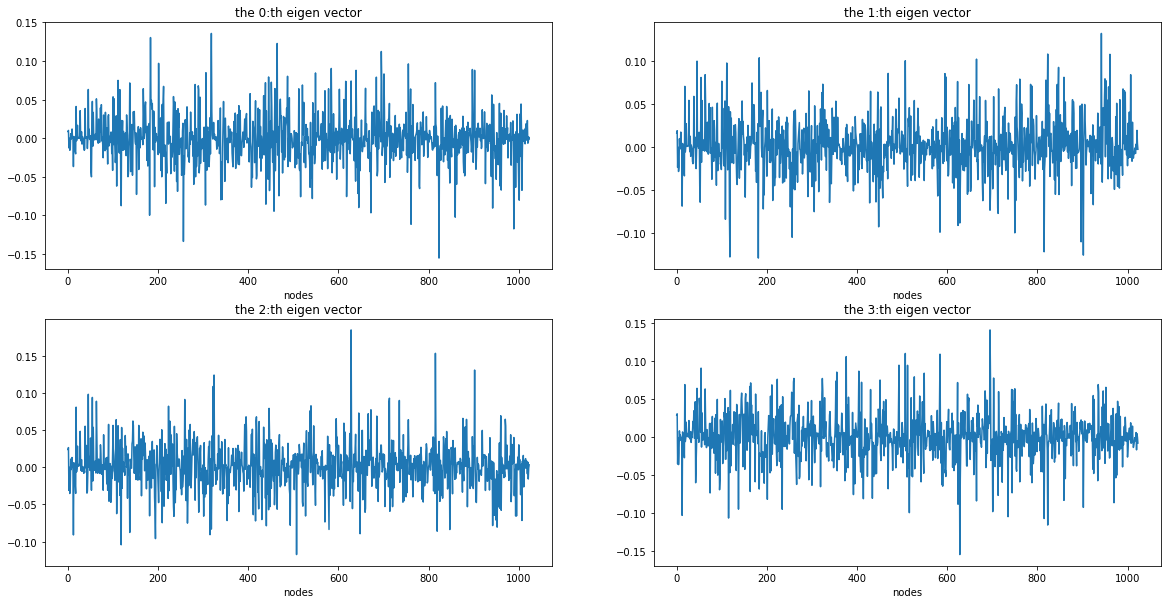

In [79]:
plt.figure(figsize=(20,10));
plt.subplot(2, 2, 1);
plt.plot(eig[1][0]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(0));
plt.subplot(2, 2, 2);
plt.plot(eig[1][1]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(1));
plt.subplot(2, 2, 3);
plt.plot(eig[1][2]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(2));
plt.subplot(2, 2, 4);
plt.plot(eig[1][3]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(3));
plt.show();

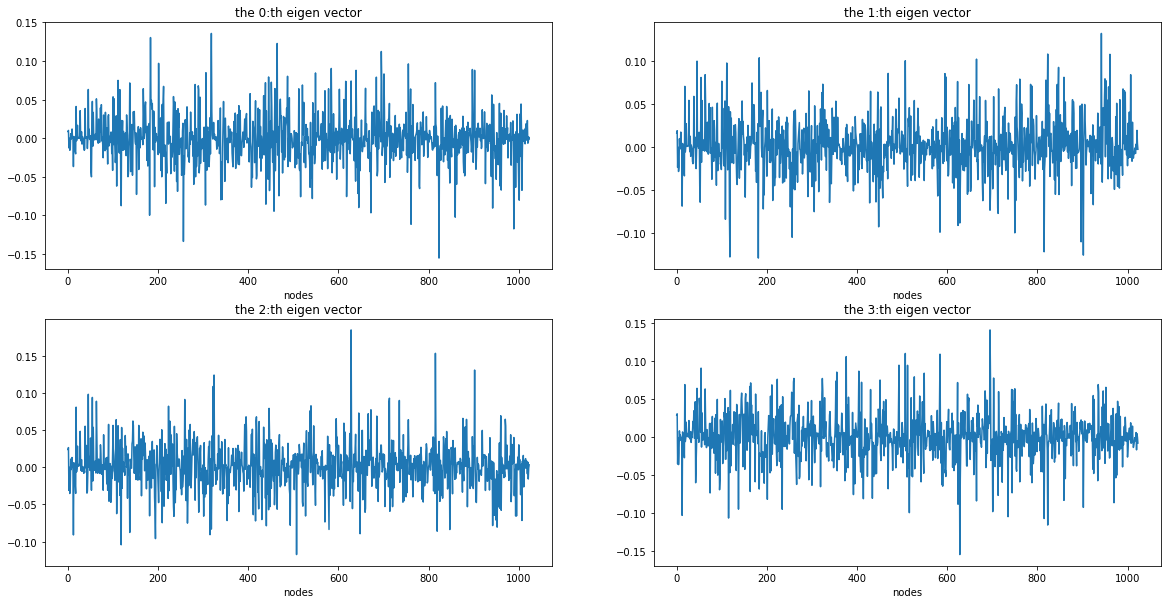

In [80]:
plt.figure(figsize=(20,10));
plt.subplot(2, 2, 1);
plt.plot(eig[1][0][0:2000]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(0));
plt.subplot(2, 2, 2);
plt.plot(eig[1][1][0:2000]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(1));
plt.subplot(2, 2, 3);
plt.plot(eig[1][2][0:2000]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(2));
plt.subplot(2, 2, 4);
plt.plot(eig[1][3][0:2000]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(3));
plt.show();

In [ ]:
# try to implement the spatial weighting, kladd kod

In [ ]:
import pysal
# import geopandas as gpd
import libpysal
from libpysal import weights
from libpysal import cg as geometry
import contextily
import geopandas
import seaborn
import pandas 
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [127]:
gdf_image = geopandas.GeoDataFrame(image);

In [128]:
gdf_image

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-997,-998,-1005,-1003,-1003,-1003,-1003,-1000,-996,-1006
1,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-998,-1009,-1007,-998,-1000,-1004,-1003,-1002,-1001,-1009
2,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-1006,-1004,-1000,-998,-999,-1006,-1003,-1002,-1005,-1000
3,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-1001,-994,-1007,-1007,-997,-1001,-999,-1003,-1006,-1002
4,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-994,-1009,-1015,-996,-991,-1000,-1006,-1009,-1003,-998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-981,-957,-884,-774,-585,-311,-86,-71,-306,-619
508,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-943,-874,-736,-556,-303,-83,-106,-350,-615,-801
509,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-831,-699,-480,-233,-61,-109,-385,-672,-846,-940
510,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,-1024,...,-659,-445,-192,-34,-113,-379,-674,-869,-966,-1010


In [140]:
# grid = np.zeros((image.shape[0],image.shape[1]));
# value = 0
# for i in range(grid.shape[0]):
#     for j in range(grid.shape[1]):
#         grid[i,j] = j;
# #         value+=1;

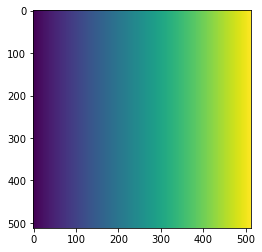

In [142]:
# plt.imshow(grid)
# plt.show()

In [143]:
gdf_grid = geopandas.GeoDataFrame(grid);

In [144]:
gdf_grid

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0
1,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0
2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0
3,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0
4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0
508,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0
509,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0
510,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0


In [148]:
wnn2 = weights.KNN(gdf_grid, 5)

ValueError: list.remove(x): x not in list

In [139]:
wnn2.neighbors[50]

[49, 51, 48, 52, 53]

In [146]:
w_kernel = weights.distance.Kernel(gdf_grid)


C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\libpysal\weights\distance.py:662: RuntimeWarning: invalid value encountered in true_divide
  zi = np.array([dict(list(zip(ni, di)))[nid] for nid in nids]) / bw[i]


In [150]:
w_kernel.neighbors[50];